In [200]:
#Importing Libraries and Loading Our Data
import json #  json package iteratively parse the json file instead of reading it all in at once
encoding="utf8"
import sys,os
import pandas as pd
from pandas import DataFrame
from pandas.io.json import json_normalize #package for flattening json in pandas df
import numpy as np
import scipy
import math
import random
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# set data path using a relative path
filename = "../NumPy/datasets/data_science_extract.json"
with open(filename, 'r') as f_in:
    columns = json.load(f_in)
    #convert nested json data to csv
    #https://medium.com/@gis10kwo/converting-nested-json-data-to-csv-using-python-pandas-dc6eddc69175
    json_normalize(columns).iloc[:, 0:].to_csv(os.path.abspath("../NumPy/datasets/data_science_extract.csv"))
    #del columns
    
# Load data 
    
pd_to_csv = pd.read_csv("../NumPy/datasets/data_science_extract.csv", index_col=0)
pd_t = pd_to_csv.iloc[:, 0:]

# Print the first three rows
#pd_t.head(3)

pd.set_option('display.height',1000)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width',1000)
df = pd.DataFrame(pd_to_csv)
df.head(3)

,careerjunction_za_courses,careerjunction_za_employer_names,careerjunction_za_future_jobtitles,careerjunction_za_historical_jobtitles,careerjunction_za_primary_jobtitle,careerjunction_za_recent_jobtitles,careerjunction_za_skills,id
0,"[u'Btech: Food Technology', u'National Diploma...","[u'Cape Herb & Spice', u'Greys Marine', u'Hein...","[u'Food technologist', u'New product developme...","[u'Marketer & Technical Liaison', u'Quality As...",Senior Food Technologist,"[u'Food Technologist', u'Product Specialist Mi...","[u'Microbiology', u'microsoft powerpoint', u'm...",1
1,"[u'B.Econ', u'Grade 12/Matric']","[u'Careerjunction', u'Gijima', u'Lateral Dynam...",[],"[u'Senior Developer', u'Senior Developer', u'S...",Senior Developer,"[u'Senior Developer', u'Senior Developer']","[u'MVC5', u'JQuery', u'C#', u'BootStrap', u'RE...",2
2,"[u'Bsc in Computer Systems', u'Higher National...","[u'Bruce Records Studio', u'Crystal MAP']","[u'Web Developer', u'Application Developer', u...",[],Social Manager,[u'Junior Developer'],"[u'C# Developer', u'MYSQL', u'PHP', u'javascri...",3


###  Data Wrangling

The data that was originally obtained was in the form of a JSON File. 
This was converted manually into a CSV file to arrive at an input that could be loaded into a Pandas DataFrame effortlessly.
We will however attempt at learning more about our features and performing appropriate wrangling steps to arrive at a form that is more suitable for analysis.

We start by understanding the dataset

In [179]:
#Understanding the Dataset
df.columns

Index([u'careerjunction_za_courses', u'careerjunction_za_employer_names', u'careerjunction_za_future_jobtitles', u'careerjunction_za_historical_jobtitles', u'careerjunction_za_primary_jobtitle', u'careerjunction_za_recent_jobtitles', u'careerjunction_za_skills', u'id'], dtype='object')

In [268]:
# examine the shape
df.shape

(2000, 8)

In [269]:
# examine the series 
df.careerjunction_za_future_jobtitles.describe()
df.careerjunction_za_future_jobtitles.value_counts() 
df.careerjunction_za_future_jobtitles.unique()

array(["[u'Food technologist', u'New product development', u'auditor', u'inspections']",
       '[]',
       "[u'Web Developer', u'Application Developer', u'C# Developer']",
       ...,
       "[u'IT Manager', u'Project Manager', u'Manager', u'Business Analyst']",
       "[u'SQL Developer', u'IT Manager', u'Business Analyst', u'IT Manager', u'Business Analyst']",
       "[u'Software Architect', u'Enterprise Architect']"], dtype=object)

There are a total of 2000 records with 8 features.

We see that the primary jobtitle have no record for space. This indicates that we do not have information about the empty space. 

In [247]:
orders['careerjunction_za_primary_jobtitle'].describe()

count                   2000
unique                  1197
top       Software Developer
freq                     121
Name: careerjunction_za_primary_jobtitle, dtype: object

In [230]:
#sorting dataframe column
df_sort = df.sort_values("careerjunction_za_primary_jobtitle")
df_sort.head(3)

,careerjunction_za_courses,careerjunction_za_employer_names,careerjunction_za_future_jobtitles,careerjunction_za_historical_jobtitles,careerjunction_za_primary_jobtitle,careerjunction_za_recent_jobtitles,careerjunction_za_skills,id
1592,"[u'Bsc Informatics', u'Computer Hardware Certi...","[u'Absolve', u'Alexander Forbes', u'Bidvest Ba...","[u'Developer', u'Systems Analyst/ Databases', ...",[u'Computer Technician'],.NET Analyst Developer,"[u'Consultant', u'.NET Developer']","[u'Office Suite', u'Visual Studio 08 - 12', u'...",1593
1415,[u'B.TECH'],"[u'Sebata', u'VANESBEN BUSINESS ASSOCIATES', u...","[u'C# Developer', u'.NET Developer']",[],.NET Developer,"[u'.NET Developer', u'.NET Developer']","[u'SQL', u'JAVA SCRIPT', u'CSS', u'HTML', u'WC...",1416
1019,"[u'Information Systems', u'Bsc Information Sys...","[u'Chartered Systems Intergration', u'DVT', u'...","[u'Lead Software Developer', u'Software Develo...",[u'Intern'],.NET Developer,"[u'Senior Software Developer', u'Software Deve...","[u'SAP Business one Developer \u2022', u'Bizta...",1020


In [222]:
descriptions = df.groupby(["careerjunction_za_employer_names", "careerjunction_za_skills","careerjunction_za_primary_jobtitle"])["id"].count().reset_index(name="count")
descriptions.head(3)

,careerjunction_za_employer_names,careerjunction_za_skills,careerjunction_za_primary_jobtitle,count
0,"[u""Activ'Browser"", u'Credit Agricole', u'Infos...","[u'jQuery', u'Javascript', u'LAMP', u'Zend Fra...",Full Stack developer,1
1,"[u""Ag's Distributors"", u'Blue Security', u'Hol...","[u'.net developer', u'C# Developer', u'SQL And...",Senior Developer C#,1
2,"[u""Hassan Mansour Int'L Co"", u'Maegabyte Compu...","[u'Oracle', u'Dev. 2000', u'Visual Basic', u'M...",Analyst-Developer,1


Using this new dataframe we can easily see the most popular jobtitle of each feature. For example the different kinds of the most primary job title data, 
the developer.


In [234]:
descriptions = descriptions[descriptions['careerjunction_za_primary_jobtitle'].str.contains("Developer") | descriptions['careerjunction_za_primary_jobtitle'].str.contains("Software Developer")]
descriptions.sort_values(['count'], ascending=False)[:10] 

,careerjunction_za_employer_names,careerjunction_za_skills,careerjunction_za_primary_jobtitle,count
224,"[u'Above Average Tutoring', u'Alexander Forbes...","[u'C# .NET', u'TDD', u'Sql', u'HTML', u'DDD', ...",Software Developer,1
233,"[u'Absolve', u'Alexander Forbes', u'Bidvest Ba...","[u'Office Suite', u'Visual Studio 08 - 12', u'...",.NET Analyst Developer,1
317,"[u'Adapt IT', u'Alexander Forbes', u'Gijima AS...","[u'Visio', u'UML', u'SSRS', u'SSIS', u'DAX', u...",Microsoft Senior BI Developer,1
415,[u'Alexander Forbes Group'],"[u'Microsoft Office', u'Emotional Intelligence...",Trainee Developer,1
419,"[u'Alexander Forbes', u'CGM Industrial', u'Inf...","[u'Visual Basic', u'SQL', u'Microsoft Access',...",Software Developer,1
420,"[u'Alexander Forbes', u'Sanlam']","[u'Cobol', u'Easytrieve Plus', u'IMS', u'JCL',...",Senior Analyst Cobol Developer,1
1626,"[u'JMR Software', u'Onewaterloo Technologies',...","[u'Microsoft Office', u'Systems Analysis & Des...",Business Analyst Developer General Management,1


One can see that software developer dominates all of the items but there's obviously way too much going on here. How about just the top ten most popular items.

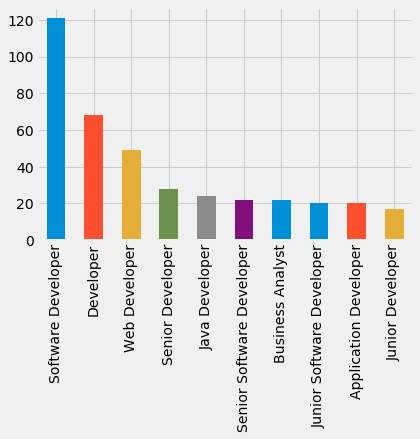

In [259]:
cnt = df['careerjunction_za_primary_jobtitle'].value_counts(ascending=False)[:10].plot(kind='bar') 
cnt

This much easier to read and one can clearly see the software developer and developer are the most popular jobtitle included in the data.
The following show the different varieties of developers job title. However, I limited it to the top ten which you can see here.

In [271]:
df['careerjunction_za_primary_jobtitle'].value_counts(ascending=False)[:10]

Software Developer           121
Developer                     68
Web Developer                 49
Senior Developer              28
Java Developer                24
Senior Software Developer     22
Business Analyst              22
Junior Software Developer     20
Application Developer         20
Junior Developer              17
Name: careerjunction_za_primary_jobtitle, dtype: int64

In [236]:
#df.crosstab(df.careerjunction_za_primary_jobtitle, df.careerjunction_za_recent_jobtitles)
type(df.careerjunction_za_recent_jobtitles)

pandas.core.series.Series

In [274]:
#df.careerjunction_za_recent_jobtitles[6]

#df.careerjunction_za_skills.iloc[:]


In [238]:
df.careerjunction_za_recent_jobtitles[568] == df.careerjunction_za_recent_jobtitles[6]

False

In [265]:
#df.careerjunction_za_future_jobtitles.value_counts().head(5).plot.bar(title="Top 10 Posters")
#10 primary jobs with most recent
df['careerjunction_za_primary_jobtitle'].value_counts(ascending=False)[:10]

Software Developer           121
Developer                     68
Web Developer                 49
Senior Developer              28
Java Developer                24
Senior Software Developer     22
Business Analyst              22
Junior Software Developer     20
Application Developer         20
Junior Developer              17
Name: careerjunction_za_primary_jobtitle, dtype: int64

### Content-Based Recommender in Python

#### Plot Description Based Recommender

In this section, we build a system that recommends job title that are similar to a 
particular jobs. More specifically, we compute pairwise similarity scores for all jobs
based on their plot descriptions and recommend recent job position based on that similarity score

The plot description is available as the primary job title feature in the dataset.
In its current form, it is not possible to compute the similarity between any jobs

We compute Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each document. 
This will give you a matrix where each column represents a word in the overview vocabulary (all 
the words that appear in at least one document) and each column represents a movie, as before.

In its essence, the TF-IDF score is the frequency of a word occurring in a document, 
down-weighted by the number of documents in which it occurs. This is done to reduce 
the importance of words that occur frequently in plot overviews and therefore, 
their significance in computing the final similarity score.

Fortunately, scikit-learn gives you a built-in TfIdfVectorizer class that produces 
the TF-IDF matrix in a couple of lines.

In [275]:
#Import TfIdfVectorizer from scikit-learn
import sklearn
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
from sklearn.metrics.pairwise import linear_kernel

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df['careerjunction_za_recent_jobtitles'] = df['careerjunction_za_recent_jobtitles'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['careerjunction_za_recent_jobtitles'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)


In [276]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df.index, index=df['careerjunction_za_primary_jobtitle']).drop_duplicates()

In [278]:
# Function that takes in job title as input and outputs most similar job title
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the jobs that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the jobtitle based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar jobs
    sim_scores = sim_scores[1:11]

    # Get the jobtitle indices
    jobtitle_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar jobs title
    return df['id'].iloc[jobtitle_indices]

In [279]:
get_recommendations('Software Developer', 6)

TypeError: 'int' object has no attribute '__getitem__'